## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Loading datasets

In [2]:
pd.set_option('display.max_columns', None)

### Single user dataframe

In [3]:
data = pd.read_csv('ExtraSensory/00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv')

# extract user UUID and add to dataframe
data['UUID'] = os.listdir('ExtraSensory/')[0].split('.')[0]

# rearrage column to make UUID the first column
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

### Combining all user into one dataframe

In [4]:
user_list = [] # list to hold each user dataframe

for file in os.listdir('ExtraSensory/'):
    
    # read user csv file to dataframe
    df = pd.read_csv('ExtraSensory/'+ file)
    
    # extract user uuid and add to dataframe
    df['UUID'] = file.split('.')[0]
    
    # rearrage column to make UUID the first column
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    
    user_list.append(df)
    
# combine all 60 user into one dataframe
sensory_data = pd.concat(user_list)
sensory_data

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

## Inspecting DataFrame

In [51]:
sensory_data.iloc[:, 200:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377346 entries, 0 to 4972
Data columns (total 79 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   discrete:on_the_phone:is_False               377346 non-null  float64
 1   discrete:on_the_phone:is_True                377346 non-null  float64
 2   discrete:on_the_phone:missing                377346 non-null  float64
 3   discrete:ringer_mode:is_normal               377346 non-null  float64
 4   discrete:ringer_mode:is_silent_no_vibrate    377346 non-null  float64
 5   discrete:ringer_mode:is_silent_with_vibrate  377346 non-null  float64
 6   discrete:ringer_mode:missing                 377346 non-null  float64
 7   discrete:wifi_status:is_not_reachable        377346 non-null  float64
 8   discrete:wifi_status:is_reachable_via_wifi   377346 non-null  float64
 9   discrete:wifi_status:is_reachable_via_wwan   377346 non-null 

In [6]:
sensory_data.describe()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_b

In [7]:
# columns
for col in sensory_data.columns:
    print(col)

UUID
timestamp
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_energy_band2
raw_acc:magnitude_spectrum:log_energy_band3
raw_acc:magnitude_spectrum:log_energy_band4
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:std_x
raw_acc:3d:std_y
raw_acc:3d:std_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4
proc_gyro:magnitude_stats:percentile25
p

In [8]:
# Number of columns with missing values
sensory_data.isnull().any().sum()

242

In [9]:
# # checking for columns with missing values
# for col in sensory_data.columns:
#     print(col, '  ', sensory_data[col].isna().sum())

In [10]:
# checking for duplicate
sensory_data.duplicated().any()

False

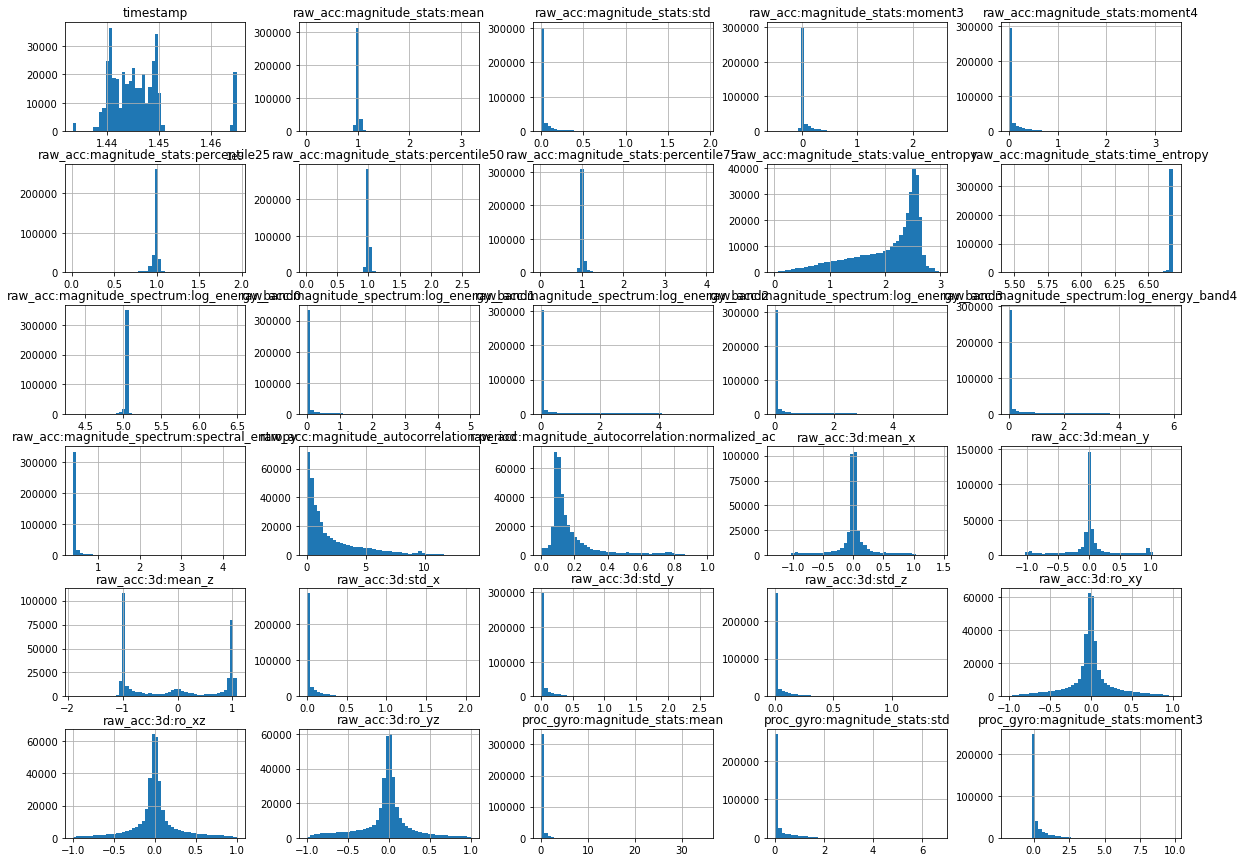

In [11]:
sensory_data.iloc[:, :31].hist(bins=50, figsize=(20,15))
plt.show()

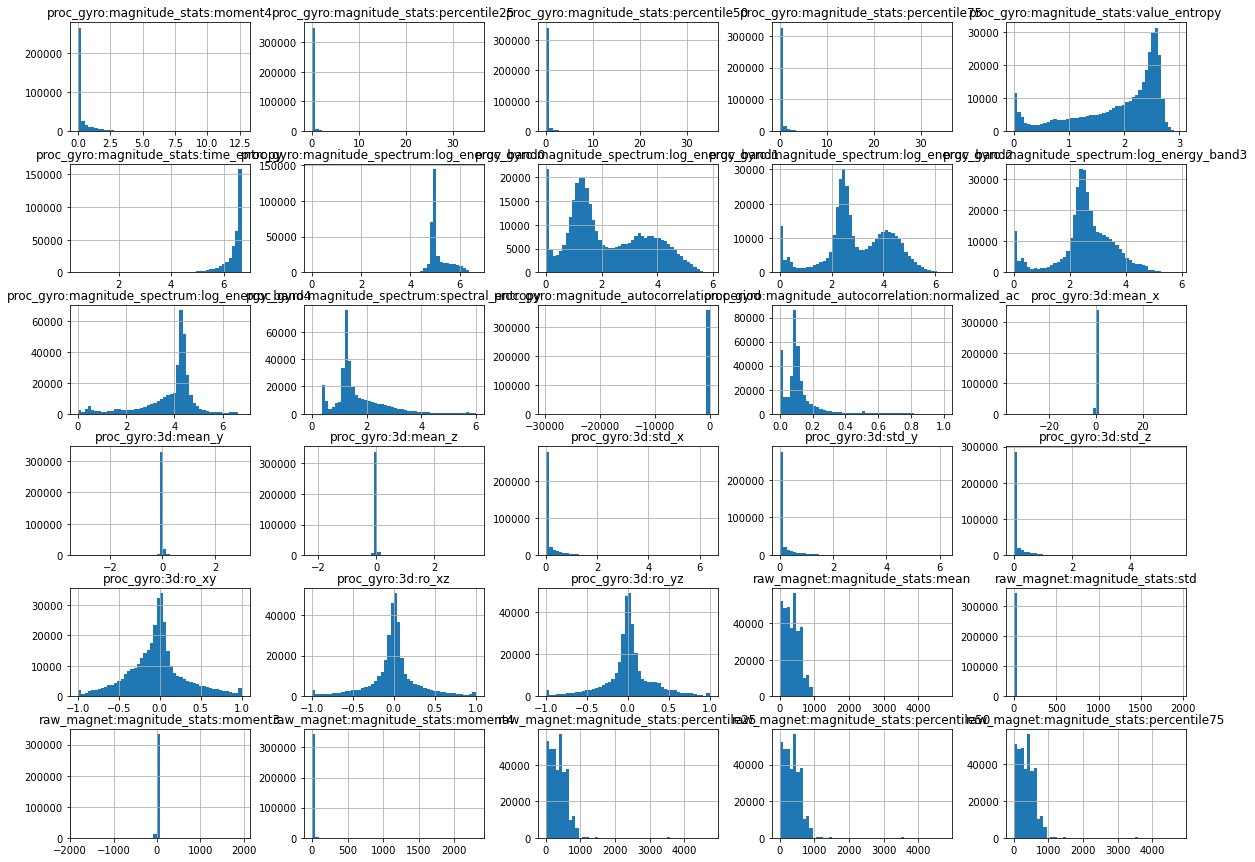

In [12]:
sensory_data.iloc[:, 31:61].hist(bins=50, figsize=(20,15))
plt.show()

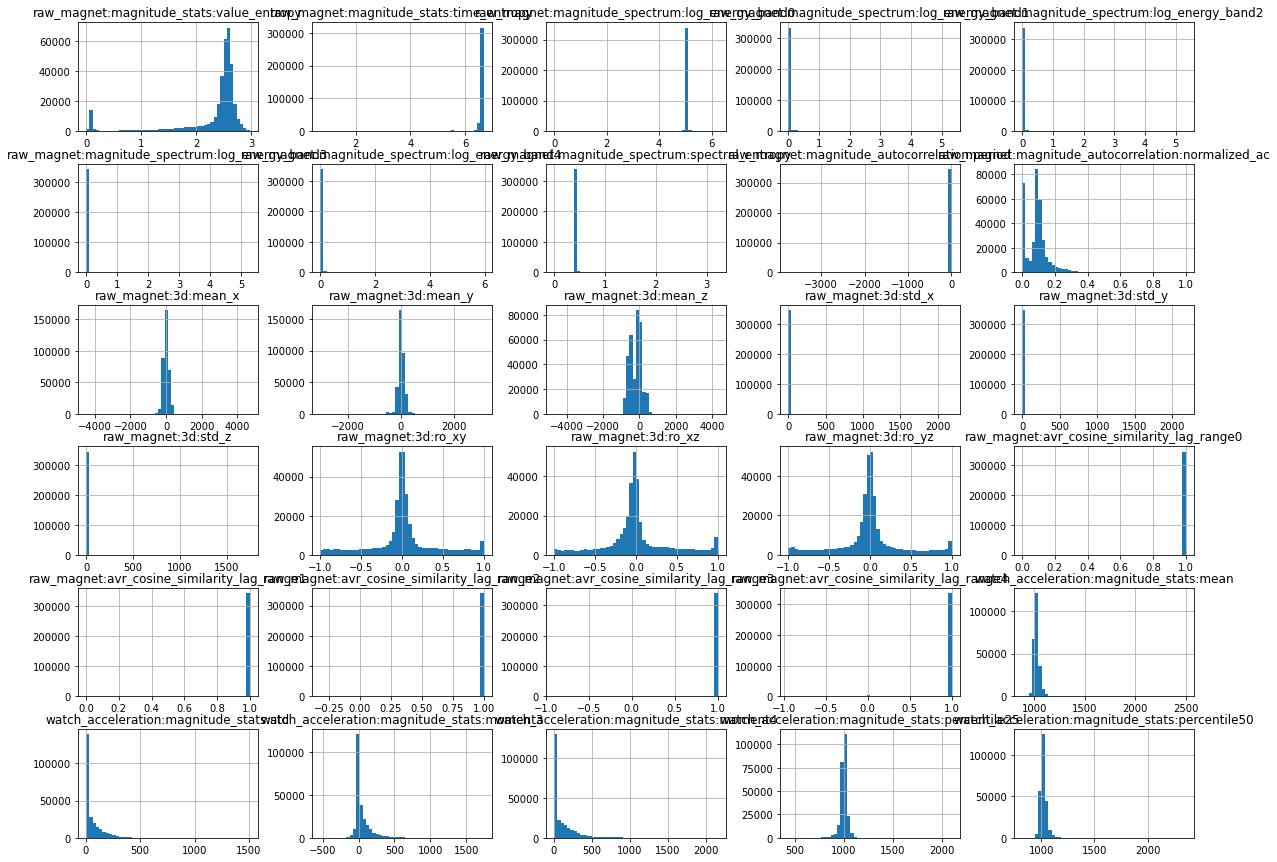

In [13]:
sensory_data.iloc[:, 61:91].hist(bins=50, figsize=(20,15))
plt.show()

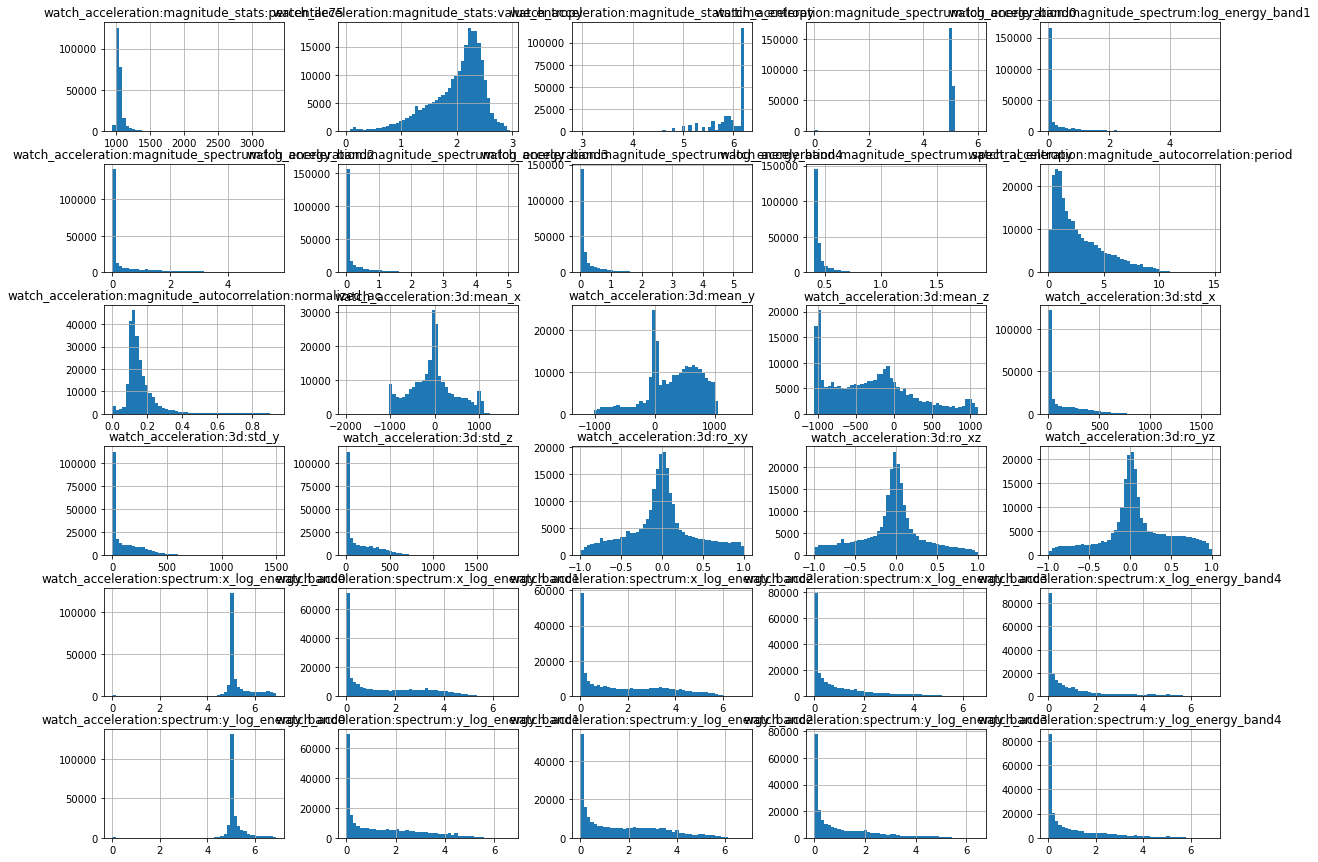

In [14]:
sensory_data.iloc[:, 91:121].hist(bins=50, figsize=(20,15))
plt.show()

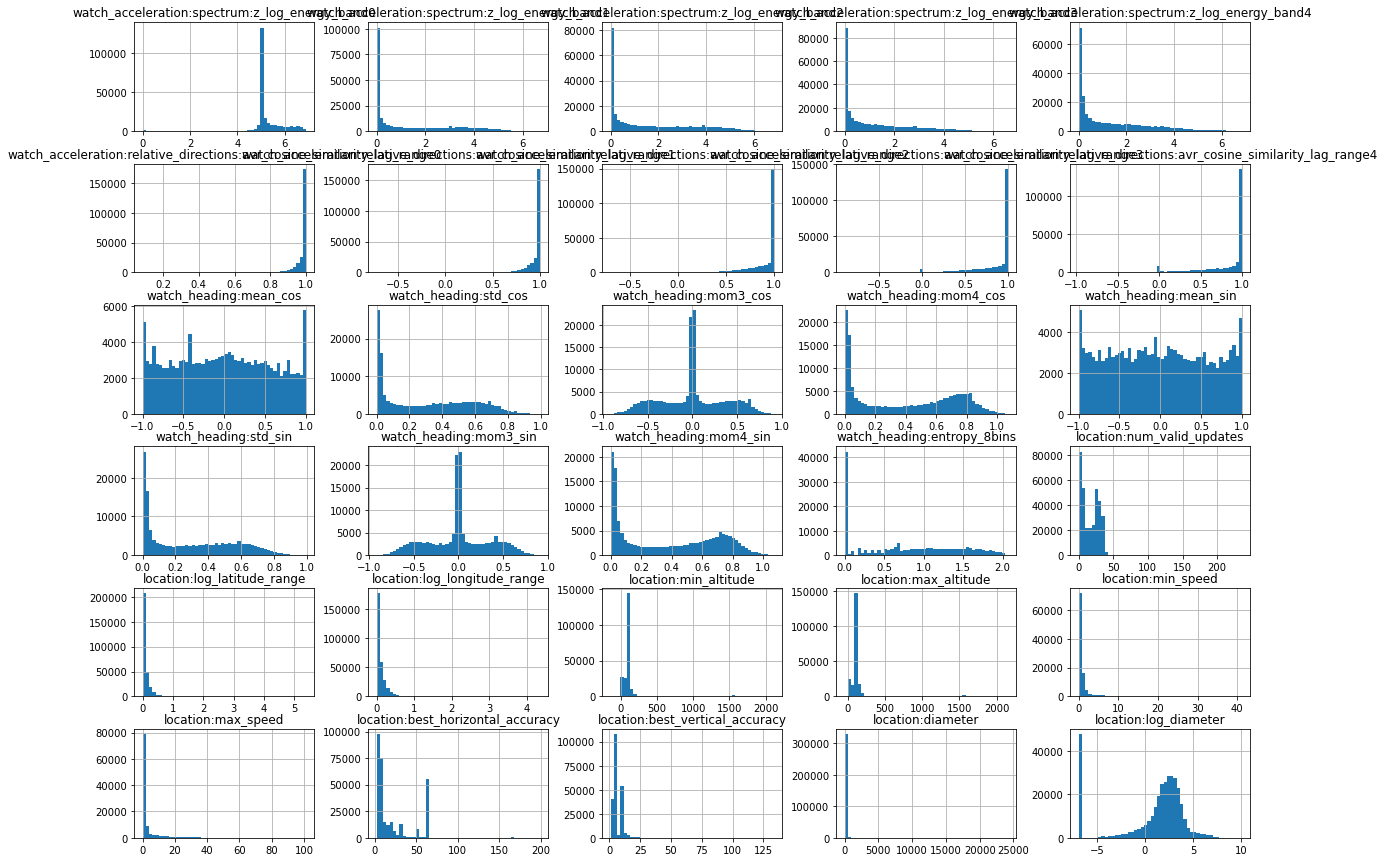

In [15]:
sensory_data.iloc[:, 121:151].hist(bins=50, figsize=(20,15))
plt.show()

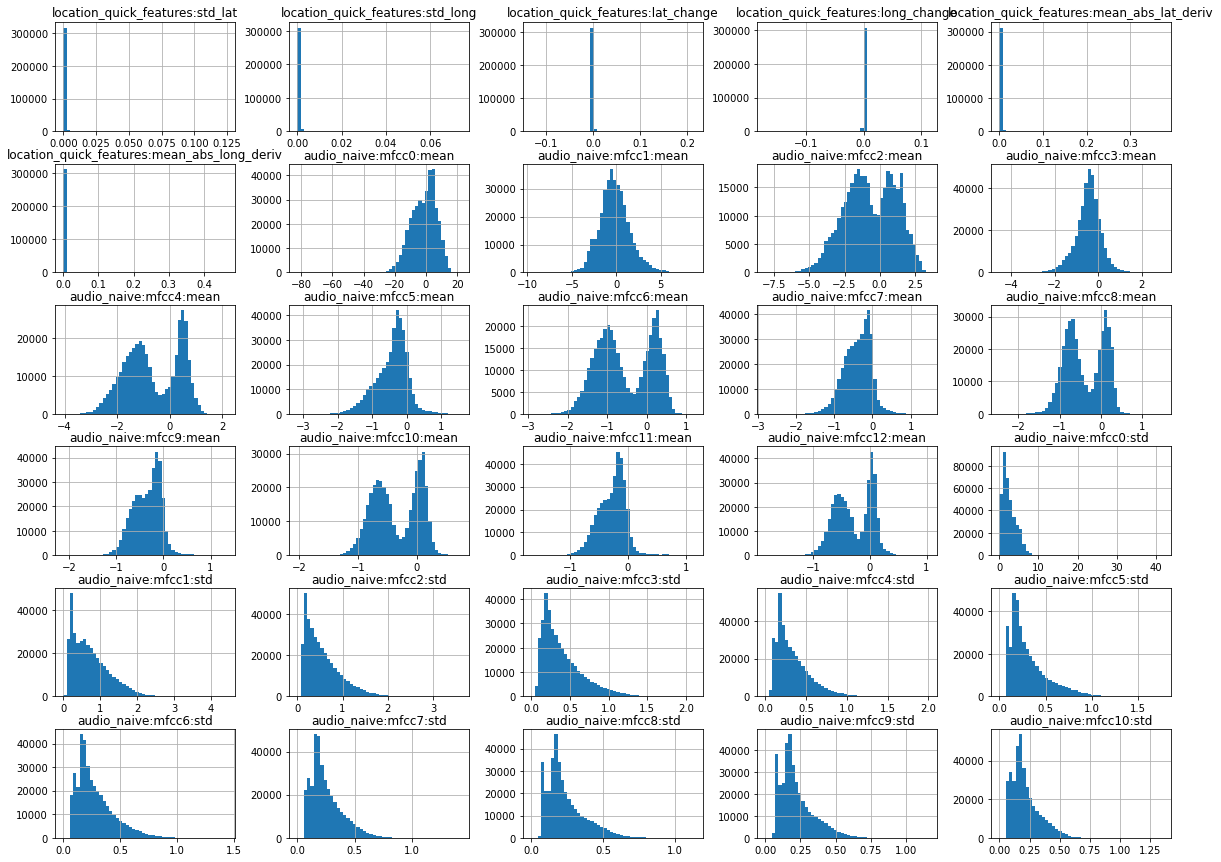

In [16]:
sensory_data.iloc[:, 151:181].hist(bins=50, figsize=(20,15))
plt.show()

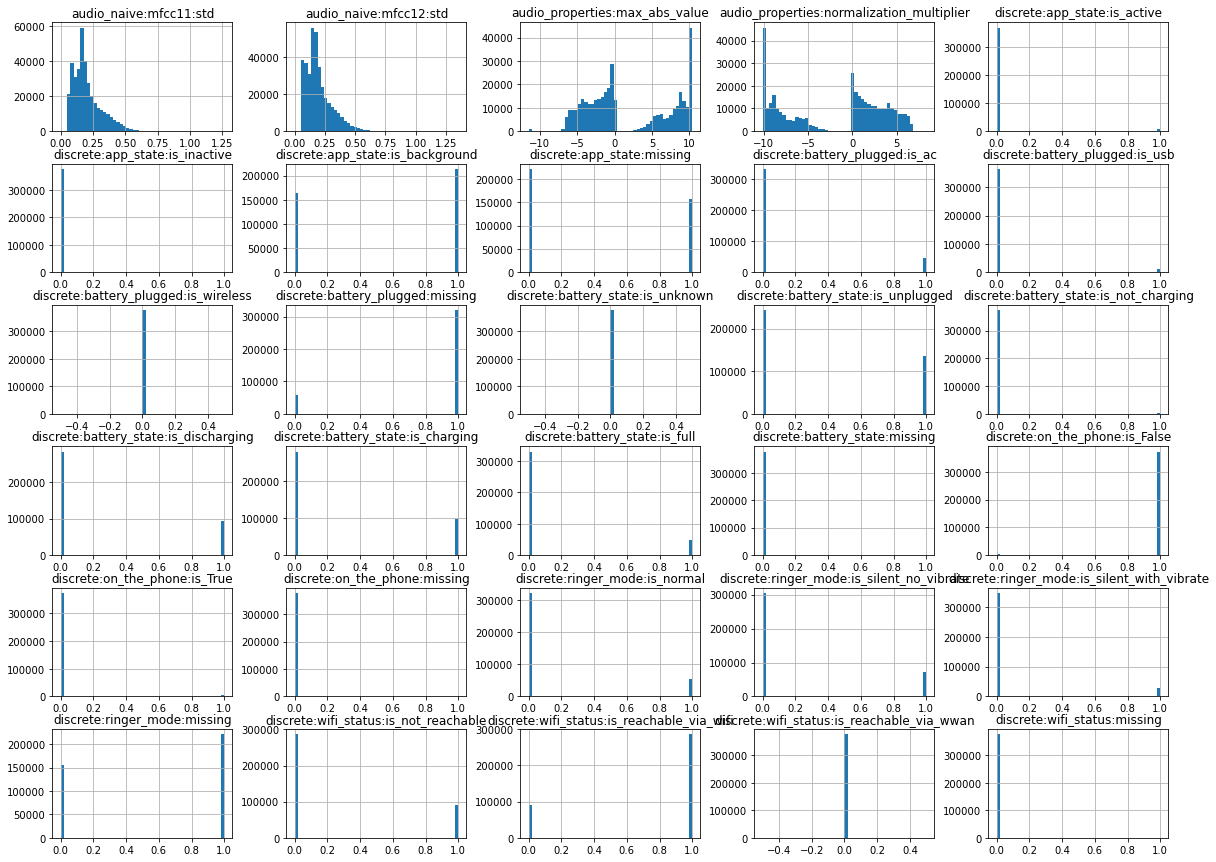

In [17]:
sensory_data.iloc[:, 181:211].hist(bins=50, figsize=(20,15))
plt.show()

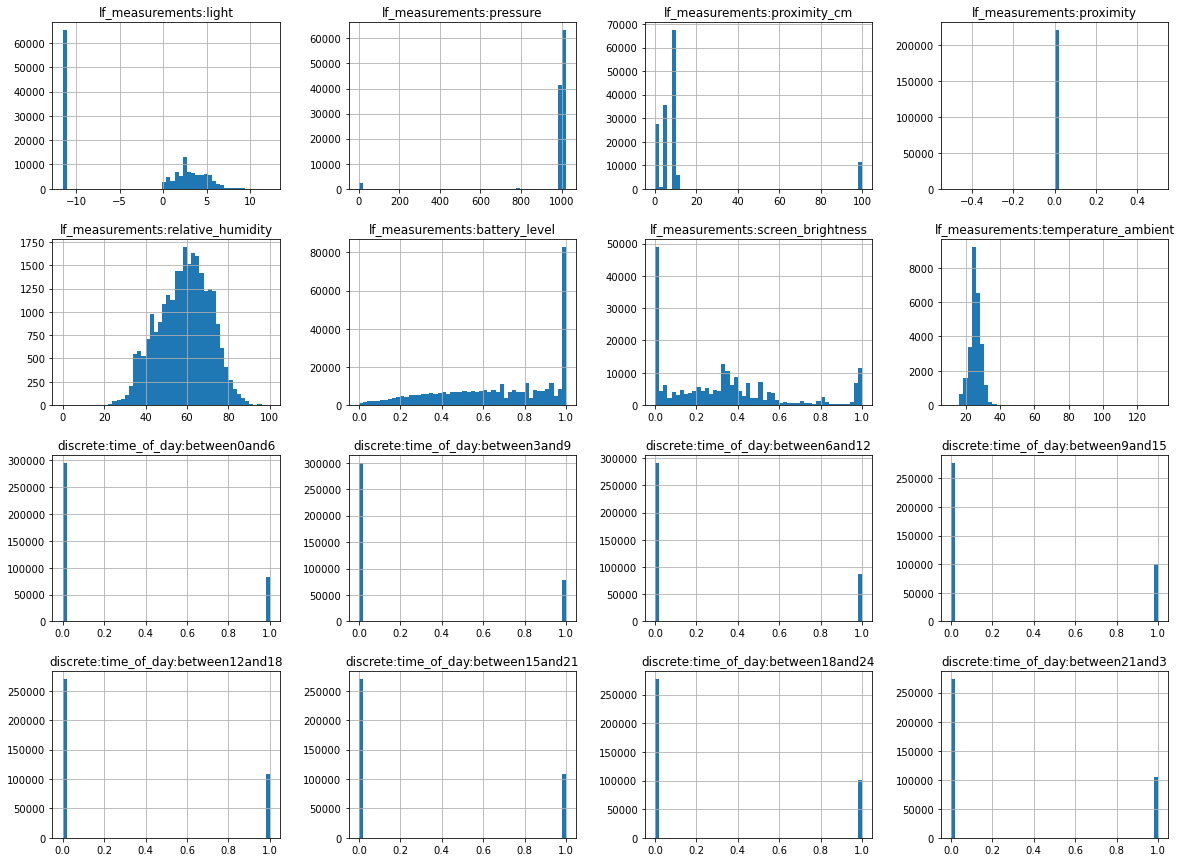

In [18]:
sensory_data.iloc[:, 211:227].hist(bins=50, figsize=(20,15))
plt.show()

### EDA

#### Labels

In [19]:
sensor_labels = sensory_data.iloc[:, 227:]
sensor_labels

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
1,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
2,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
3,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
4,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [20]:
# Checking which label source had the highest count of examples
label_source = sensor_labels['label_source'].value_counts(normalize=True).reset_index()
label_source = label_source.rename(columns={'index':'label_source', 'label_source':'percentage'})
label_source

,label_source,percentage
0,2,0.697185
1,-1,0.182925
2,1,0.061784
3,6,0.028942
4,4,0.018540
5,5,0.008584
6,0,0.001606
7,3,0.000435


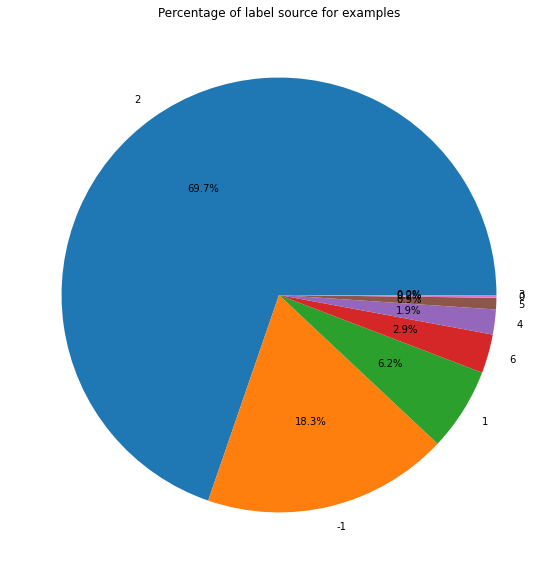

In [21]:
labels = label_source['label_source'].unique()
plt.figure(figsize=(10, 10))
plt.pie(label_source['percentage'], labels=labels, autopct='%0.1f%%')
plt.title('Percentage of label source for examples')
plt.show()

#### Checking for closely related columns

In [22]:
bicycle = sensor_labels[sensor_labels['label:BICYCLING'] == 1.0].reset_index(drop=True)

for col in bicycle.columns:
    print(bicycle[col].value_counts(dropna=False, normalize=True), '\n\n')

0.0    0.978884
NaN    0.021116
Name: label:LYING_DOWN, dtype: float64 


0.0    1.0
Name: label:SITTING, dtype: float64 


0.0    1.0
Name: label:FIX_walking, dtype: float64 


0.0    0.503386
NaN    0.496614
Name: label:FIX_running, dtype: float64 


1.0    1.0
Name: label:BICYCLING, dtype: float64 


0.0    0.960159
NaN    0.039841
Name: label:SLEEPING, dtype: float64 


NaN    0.831076
0.0    0.168924
Name: label:LAB_WORK, dtype: float64 


NaN    0.803586
0.0    0.196414
Name: label:IN_CLASS, dtype: float64 


0.0    0.724303
NaN    0.275697
Name: label:IN_A_MEETING, dtype: float64 


NaN    0.619721
0.0    0.375100
1.0    0.005179
Name: label:LOC_main_workplace, dtype: float64 


NaN    0.765538
0.0    0.192829
1.0    0.041633
Name: label:OR_indoors, dtype: float64 


NaN    0.769323
1.0    0.192829
0.0    0.037849
Name: label:OR_outside, dtype: float64 


NaN    0.533665
0.0    0.466335
Name: label:IN_A_CAR, dtype: float64 


NaN    0.682271
0.0    0.317729
Name: label:ON_A_BUS,

In [23]:
# Checking for labels with high percentage of relevant examples:
for col in sensor_labels.columns:
    print(sensor_labels[col].value_counts(dropna=False, normalize=True), '\n\n')

0.0    0.528727
1.0    0.276166
NaN    0.195107
Name: label:LYING_DOWN, dtype: float64 


0.0    0.451146
1.0    0.361355
NaN    0.187499
Name: label:SITTING, dtype: float64 


0.0    0.753839
NaN    0.187499
1.0    0.058662
Name: label:FIX_walking, dtype: float64 


NaN    0.626682
0.0    0.370429
1.0    0.002889
Name: label:FIX_running, dtype: float64 


NaN    0.641753
0.0    0.344943
1.0    0.013303
Name: label:BICYCLING, dtype: float64 


0.0    0.535882
NaN    0.244015
1.0    0.220103
Name: label:SLEEPING, dtype: float64 


NaN    0.869099
0.0    0.120704
1.0    0.010198
Name: label:LAB_WORK, dtype: float64 


NaN    0.710973
0.0    0.272834
1.0    0.016192
Name: label:IN_CLASS, dtype: float64 


0.0    0.599079
NaN    0.387265
1.0    0.013656
Name: label:IN_A_MEETING, dtype: float64 


NaN    0.465406
0.0    0.444640
1.0    0.089955
Name: label:LOC_main_workplace, dtype: float64 


1.0    0.489450
NaN    0.478447
0.0    0.032103
Name: label:OR_indoors, dtype: float64 


NaN    0

#### The Following labels were found to have high enough percentage (ie. above 20%) of relevant examples
* label:LOC_home
* label:LYING DOWN
* label:LOC
* label:SITTING
* label:OR_indoors
* label:PHONE_ON_TABLE
* label:SLEEPING

# 

### Predicting label:LYING DOWN

In [24]:
# Getting features and label:LYING_DOWN
lying_down_data = sensory_data.iloc[:, :227]
lying_down_data['label:LYING_DOWN'] = sensory_data.iloc[:, 227]
lying_down_data

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [25]:
# Dropping all null values in the label:LYING_DOWN column
lying_down_data = lying_down_data.dropna(subset=['label:LYING_DOWN'])
lying_down_data

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [26]:
# Filling all null values with the mean of each column
values = {}
for col in lying_down_data.iloc[:, 1:-1].columns:
    values[col] = lying_down_data[col].mean()
    
lying_down_data = lying_down_data.fillna(value=values)

In [27]:
# checking for missing values
lying_down_data.isnull().any().sum()

0

In [28]:
# Checking the correlation between features and label
corr_matrix = lying_down_data.corr()
corr_df = corr_matrix['label:LYING_DOWN'].sort_values(ascending=False).reset_index()
corr_df = corr_df.rename(columns={'index':'features', 'label:LYING_DOWN':'correlation'})
corr_df

,features,correlation
0,label:LYING_DOWN,1.000000
1,discrete:time_of_day:between0and6,0.629165
2,discrete:time_of_day:between3and9,0.458558
3,discrete:battery_state:is_full,0.446425
4,discrete:time_of_day:between21and3,0.365044
...,...,...
222,audio_naive:mfcc1:std,-0.420236
223,discrete:battery_plugged:is_wireless,NaN
224,discrete:battery_state:is_unknown,NaN
225,discrete:wifi_status:is_reachable_via_wwan,NaN


In [29]:
lying_down_data.drop(['discrete:battery_plugged:is_wireless', 'discrete:battery_state:is_unknown',
                     'discrete:wifi_status:is_reachable_via_wwan', 'lf_measurements:proximity'], axis=1, inplace=True)

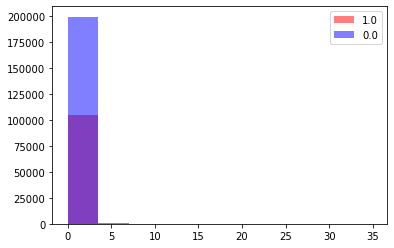

In [96]:
a = lying_down_data['proc_gyro:magnitude_stats:mean'][lying_down_data['label:LYING_DOWN'] == 1.0]
b = lying_down_data['proc_gyro:magnitude_stats:mean'][lying_down_data['label:LYING_DOWN'] == 0.0]
plt.hist(a, color='red', label='1.0', alpha=0.5)
plt.hist(b, color='blue', label='0.0', alpha=0.5)
plt.legend()
plt.show()

#### Data Preprocessing

In [31]:
# splitting data into features and labels
features = lying_down_data.iloc[:, 2:-1]
label = lying_down_data[['label:LYING_DOWN']]

##### Train test split

In [32]:
train_set, test_set, train_label, test_label = train_test_split(features, label, test_size=0.1, random_state=0, stratify=label)

In [33]:
train_set.shape, train_label.shape

((273350, 221), (273350, 1))

#### Standizing the features

In [34]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

In [35]:
# changing datatype from float64 to float32
train_set = train_set.astype('float32')
test_set = test_set.astype('float32')

In [36]:
train_label = train_label.to_numpy()
test_label = test_label.to_numpy()

#### Training with Neural Network

In [37]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from functools import partial
import keras
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

In [38]:
# RegularizedDense = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.00001))

# model = keras.models.Sequential([ 
#     keras.layers.Input(shape=(train_set.shape[1], )),
#     RegularizedDense(64),
#     BatchNormalization(),
#     Dense(32, activation='elu', kernel_initializer='he_normal'),
#     Dense(1, activation='sigmoid')
# ])


model = Sequential([
    Dense(64, activation='elu', input_shape=(train_set.shape[1],), kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(32, activation='elu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')]
)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                14208     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,705
Trainable params: 16,513
Non-traina

In [40]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', 
              metrics=['binary_accuracy'])

# Setting up early stopping:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Setting Learning Rate Scheduler:
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5)

In [41]:
history = model.fit(train_set, 
                    train_label,
                    batch_size=32,
                    epochs=50, 
                    verbose=1, 
                    validation_split=0.1, 
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/50
7688/7688 [==============================] - 15s 2ms/step - loss: 0.2042 - binary_accuracy: 0.9211 - val_loss: 0.1604 - val_binary_accuracy: 0.9404 - lr: 0.0010
Epoch 2/50
7688/7688 [==============================] - 8s 1ms/step - loss: 0.1588 - binary_accuracy: 0.9405 - val_loss: 0.1384 - val_binary_accuracy: 0.9498 - lr: 0.0010
Epoch 3/50
7688/7688 [==============================] - 15s 2ms/step - loss: 0.1407 - binary_accuracy: 0.9480 - val_loss: 0.1193 - val_binary_accuracy: 0.9572 - lr: 0.0010
Epoch 4/50
7688/7688 [==============================] - 9s 1ms/step - loss: 0.1287 - binary_accuracy: 0.9524 - val_loss: 0.1164 - val_binary_accuracy: 0.9577 - lr: 0.0010
Epoch 5/50
7688/7688 [==============================] - 9s 1ms/step - loss: 0.1191 - binary_accuracy: 0.9560 - val_loss: 0.1069 - val_binary_accuracy: 0.9609 - lr: 0.0010
Epoch 6/50
7688/7688 [==============================] - 9s 1ms/step - loss: 0.1137 - binary_accuracy: 0.9585 - val_loss: 0.1009 - val_binary_ac

7688/7688 [==============================] - 10s 1ms/step - loss: 0.0605 - binary_accuracy: 0.9778 - val_loss: 0.0782 - val_binary_accuracy: 0.9742 - lr: 5.0000e-04
Epoch 49/50
7688/7688 [==============================] - 10s 1ms/step - loss: 0.0600 - binary_accuracy: 0.9781 - val_loss: 0.0775 - val_binary_accuracy: 0.9739 - lr: 5.0000e-04
Epoch 50/50
7688/7688 [==============================] - 10s 1ms/step - loss: 0.0592 - binary_accuracy: 0.9785 - val_loss: 0.0775 - val_binary_accuracy: 0.9742 - lr: 5.0000e-04


#### Loss Curve

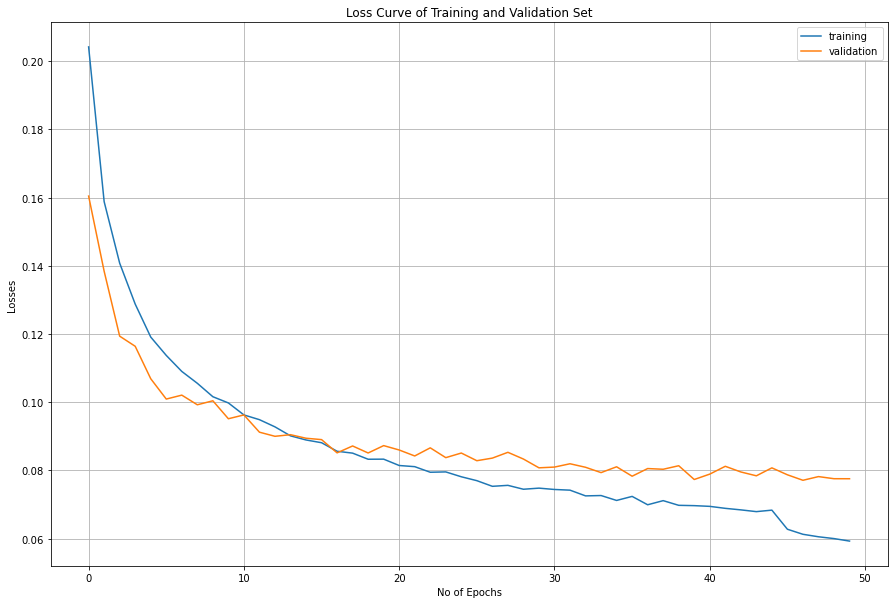

In [42]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Curve of Training and Validation Set')
plt.xlabel('No of Epochs')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)
plt.show()

#### Accuracy Curve

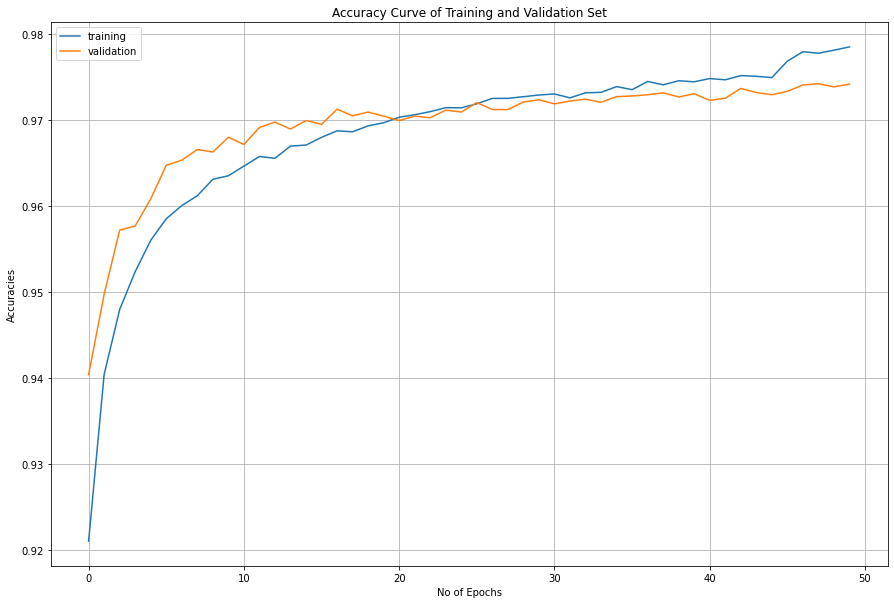

In [43]:
plt.figure(figsize=(15,10))
plt.plot(history.history['binary_accuracy'], label='training')
plt.plot(history.history['val_binary_accuracy'], label='validation')
plt.title('Accuracy Curve of Training and Validation Set')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracies')
plt.legend()
plt.grid(True)
plt.show()

#### Evaluating model on test set

In [44]:
from sklearn.metrics import classification_report, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [45]:
model.evaluate(test_set, test_label)

950/950 [==============================] - 1s 1ms/step - loss: 0.0752 - binary_accuracy: 0.9741


[0.07518991082906723, 0.9740888476371765]

In [46]:
y_pred = model.predict(test_set, verbose=1)

950/950 [==============================] - 1s 1ms/step


In [47]:
y_pred[0]

array([0.00026959], dtype=float32)

In [48]:
prediction = []
for i in range(len(test_set)):
    if y_pred[i][0] >= 0.5:
      prediction.append(1)
    else:
      prediction.append(0)

In [49]:
print(classification_report(test_label, prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     19952
         1.0       0.97      0.96      0.96     10421

    accuracy                           0.97     30373
   macro avg       0.97      0.97      0.97     30373
weighted avg       0.97      0.97      0.97     30373



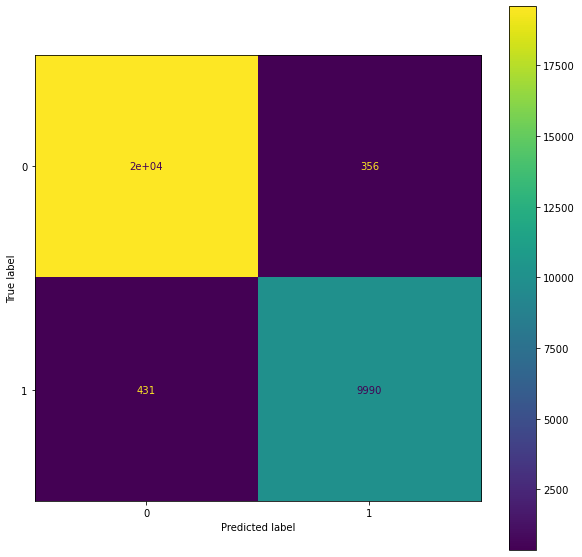

In [50]:
cm = confusion_matrix(test_label, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
#plt.savefig('/content/drive/MyDrive/checkpoint_binary/cm_5.jpg')
plt.show()

# 

### Prediciting label:LOC_home

In [53]:
# Getting features and label:LYING_DOWN
loc_home_data = pd.concat([sensory_data.iloc[:, :227], sensory_data[['label:LOC_home']]], axis=1)
loc_home_data

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [54]:
# Dropping all null values in the label:LYING_DOWN column
loc_home_data = loc_home_data.dropna(subset=['label:LOC_home'])
loc_home_data

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [55]:
# Filling all null values with the mean of each column
values = {}
for col in loc_home_data.iloc[:, 1:-1].columns:
    values[col] = loc_home_data[col].mean()
    
loc_home_data = loc_home_data.fillna(value=values)

In [57]:
# checking for missing values
loc_home_data.isnull().any().sum()

0

In [58]:
# Checking the correlation between features and label
corr_matrix = loc_home_data.corr()
corr_df = corr_matrix['label:LOC_home'].sort_values(ascending=False).reset_index()
corr_df = corr_df.rename(columns={'index':'features', 'label:LOC_home':'correlation'})
corr_df

,features,correlation
0,label:LOC_home,1.000000
1,discrete:time_of_day:between0and6,0.280100
2,discrete:wifi_status:is_reachable_via_wifi,0.257475
3,discrete:time_of_day:between21and3,0.249369
4,discrete:battery_state:is_full,0.199449
...,...,...
222,audio_naive:mfcc1:mean,-0.329570
223,discrete:battery_plugged:is_wireless,NaN
224,discrete:battery_state:is_unknown,NaN
225,discrete:wifi_status:is_reachable_via_wwan,NaN


In [59]:
loc_home_data.drop(['discrete:battery_plugged:is_wireless', 'discrete:battery_state:is_unknown',
                     'discrete:wifi_status:is_reachable_via_wwan', 'lf_measurements:proximity'], axis=1, inplace=True)

#### Data Preprocessing

In [60]:
# splitting data into features and labels
features = loc_home_data.iloc[:, 2:-1]
label = loc_home_data[['label:LOC_home']]

##### Train test Split

In [61]:
train_set, test_set, train_label, test_label = train_test_split(features, label, test_size=0.1, random_state=0, stratify=label)

In [62]:
train_set.shape, train_label.shape

((319800, 221), (319800, 1))

##### Standizing the features

In [63]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

# changing datatype from float64 to float32
train_set = train_set.astype('float32')
test_set = test_set.astype('float32')

train_label = train_label.to_numpy()
test_label = test_label.to_numpy()

##### Model

In [74]:
model = Sequential([
    Dense(64, activation='elu', input_shape=(train_set.shape[1],), kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(32, activation='elu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                14208     
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,705
Trainable params: 16,513
Non-trai

In [75]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', 
              metrics=['binary_accuracy'])

# Setting up early stopping:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Setting Learning Rate Scheduler:
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5)

# Fitting the model
history = model.fit(train_set, 
                    train_label,
                    batch_size=32,
                    epochs=100, 
                    verbose=1, 
                    validation_split=0.1, 
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/100
8995/8995 [==============================] - 11s 1ms/step - loss: 0.3150 - binary_accuracy: 0.8671 - val_loss: 0.2300 - val_binary_accuracy: 0.9103 - lr: 0.0010
Epoch 2/100
8995/8995 [==============================] - 11s 1ms/step - loss: 0.2371 - binary_accuracy: 0.9052 - val_loss: 0.1936 - val_binary_accuracy: 0.9275 - lr: 0.0010
Epoch 3/100
8995/8995 [==============================] - 10s 1ms/step - loss: 0.2102 - binary_accuracy: 0.9177 - val_loss: 0.1798 - val_binary_accuracy: 0.9325 - lr: 0.0010
Epoch 4/100
8995/8995 [==============================] - 10s 1ms/step - loss: 0.1961 - binary_accuracy: 0.9234 - val_loss: 0.1686 - val_binary_accuracy: 0.9392 - lr: 0.0010
Epoch 5/100
8995/8995 [==============================] - 11s 1ms/step - loss: 0.1857 - binary_accuracy: 0.9279 - val_loss: 0.1632 - val_binary_accuracy: 0.9409 - lr: 0.0010
Epoch 6/100
8995/8995 [==============================] - 11s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9307 - val_loss: 0.1597 - val

Epoch 48/100
8995/8995 [==============================] - 11s 1ms/step - loss: 0.1193 - binary_accuracy: 0.9539 - val_loss: 0.1283 - val_binary_accuracy: 0.9541 - lr: 2.5000e-04
Epoch 49/100
8995/8995 [==============================] - 13s 1ms/step - loss: 0.1197 - binary_accuracy: 0.9540 - val_loss: 0.1286 - val_binary_accuracy: 0.9543 - lr: 2.5000e-04
Epoch 50/100
8995/8995 [==============================] - 11s 1ms/step - loss: 0.1208 - binary_accuracy: 0.9531 - val_loss: 0.1276 - val_binary_accuracy: 0.9547 - lr: 2.5000e-04
Epoch 51/100
8995/8995 [==============================] - 11s 1ms/step - loss: 0.1194 - binary_accuracy: 0.9540 - val_loss: 0.1278 - val_binary_accuracy: 0.9538 - lr: 2.5000e-04
Epoch 52/100
8995/8995 [==============================] - 14s 2ms/step - loss: 0.1201 - binary_accuracy: 0.9536 - val_loss: 0.1271 - val_binary_accuracy: 0.9543 - lr: 2.5000e-04
Epoch 53/100
8995/8995 [==============================] - 11s 1ms/step - loss: 0.1208 - binary_accuracy: 0.953

##### Loss Curve

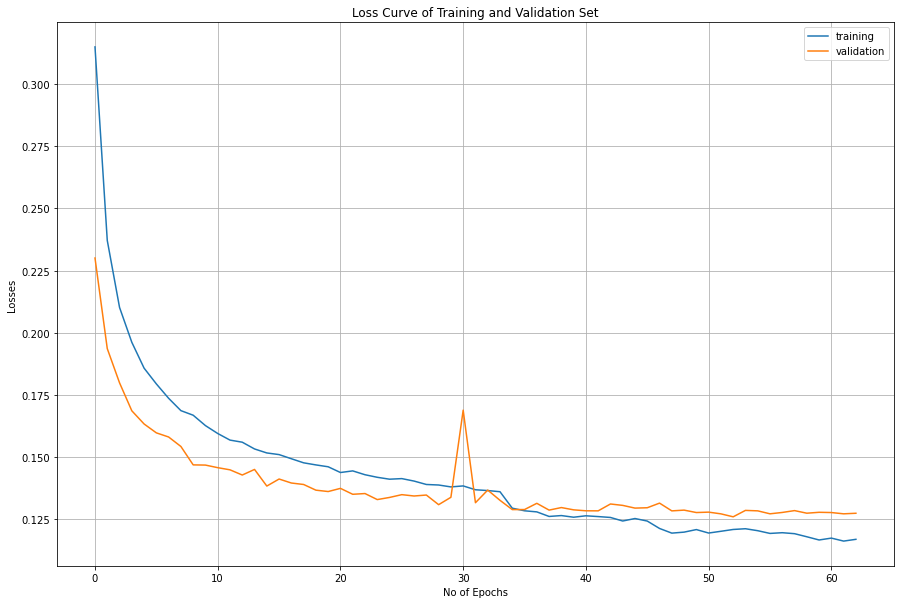

In [84]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Curve of Training and Validation Set')
plt.xlabel('No of Epochs')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)
plt.show()

##### Accuracy Curve

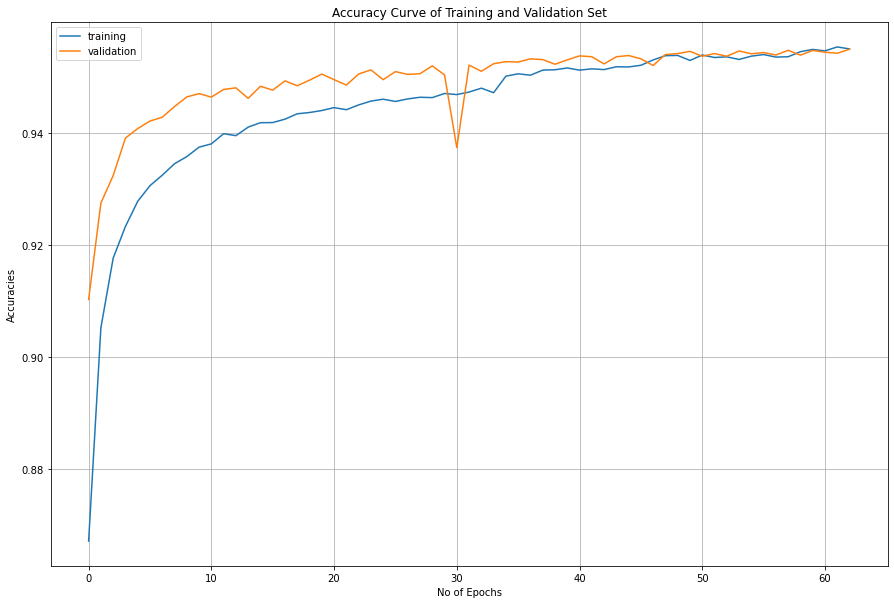

In [85]:
plt.figure(figsize=(15,10))
plt.plot(history.history['binary_accuracy'], label='training')
plt.plot(history.history['val_binary_accuracy'], label='validation')
plt.title('Accuracy Curve of Training and Validation Set')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracies')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
model.evaluate(test_set, test_label)

1111/1111 [==============================] - 2s 1ms/step - loss: 0.1270 - binary_accuracy: 0.9533


[0.12700320780277252, 0.953312337398529]

In [87]:
y_pred = model.predict(test_set, verbose=1)

1111/1111 [==============================] - 1s 825us/step


In [88]:
prediction = []
for i in range(len(test_set)):
    if y_pred[i][0] >= 0.5:
      prediction.append(1)
    else:
      prediction.append(0)

In [89]:
print(classification_report(test_label, prediction))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96     20245
         1.0       0.94      0.95      0.95     15289

    accuracy                           0.95     35534
   macro avg       0.95      0.95      0.95     35534
weighted avg       0.95      0.95      0.95     35534



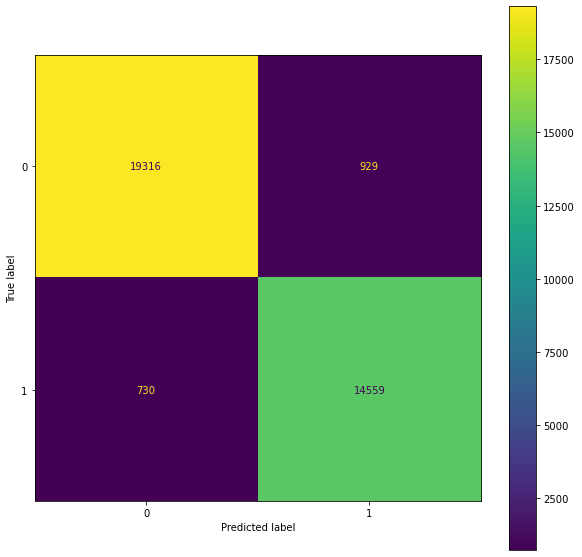

In [90]:
cm = confusion_matrix(test_label, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
#plt.savefig('/content/drive/MyDrive/checkpoint_binary/cm_5.jpg')
plt.show()

# 

# Predicting all the following labels together
* label:LOC_home
* label:LYING DOWN
* label:SITTING
* label:OR_indoors
* label:PHONE_ON_TABLE
* label:SLEEPING

In [158]:
# Getting features and relevant labels
data = pd.concat([sensory_data.iloc[:, :227], sensory_data[['label:LOC_home', 'label:LYING_DOWN',
                                                                    'label:SITTING', 'label:OR_indoors',
                                                                    'label:PHONE_ON_TABLE', 'label:SLEEPING']]], axis=1)
data

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [159]:
# Dropping all null values in the labels
data = data.dropna(subset=['label:LOC_home', 'label:LYING_DOWN','label:SITTING', 'label:OR_indoors',
                                    'label:PHONE_ON_TABLE', 'label:SLEEPING'])
data

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [160]:
# Filling all null values with the mean of each column
values = {}
for col in data.iloc[:, 1:-6].columns:
    values[col] = data[col].mean()
    
data = data.fillna(value=values)

In [161]:
# checking for missing values
data.isnull().any().sum()

0

In [162]:
data.drop(['discrete:battery_plugged:is_wireless', 'discrete:battery_state:is_unknown',
                     'discrete:wifi_status:is_reachable_via_wwan', 'lf_measurements:proximity'], axis=1, inplace=True)

#### Data Preprcessing

In [163]:
# splitting data into features and labels
features = data.iloc[:, 2:-6]
labels = data[['label:LOC_home', 'label:LYING_DOWN','label:SITTING', 'label:OR_indoors','label:PHONE_ON_TABLE', 
              'label:SLEEPING']]

##### Train Test Split

In [164]:
train_set, test_set, train_label, test_label = train_test_split(features, labels, test_size=0.2, random_state=0, stratify=labels)

In [165]:
train_set.shape, train_label.shape

((79733, 221), (79733, 6))

In [166]:
train_label.to_numpy()[0]

array([1., 1., 0., 1., 1., 1.])

##### Standizing features

In [167]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

# changing datatype from float64 to float32
train_set = train_set.astype('float32')
test_set = test_set.astype('float32')

In [170]:
train_label = train_label.to_numpy()
test_label = test_label.to_numpy()

In [171]:
train_label[0]

array([1., 1., 0., 1., 1., 1.])

##### Model

In [172]:
model = Sequential([
    Dense(64, activation='elu', input_shape=(train_set.shape[1],), kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(32, activation='elu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(train_label.shape[1], activation='sigmoid')]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                14208     
                                                                 
 batch_normalization_12 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_13 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 6)                 198       
                                                                 
Total params: 16,870
Trainable params: 16,678
Non-trai

In [173]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', 
              metrics=['binary_accuracy'])

# Setting up early stopping:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Setting Learning Rate Scheduler:
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5)

# Fitting the model
history = model.fit(train_set, 
                    train_label,
                    batch_size=32,
                    epochs=100, 
                    verbose=1, 
                    validation_split=0.1, 
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/100
2243/2243 [==============================] - 6s 2ms/step - loss: 0.2596 - binary_accuracy: 0.8925 - val_loss: 0.1952 - val_binary_accuracy: 0.9206 - lr: 0.0010
Epoch 2/100
2243/2243 [==============================] - 3s 1ms/step - loss: 0.1918 - binary_accuracy: 0.9223 - val_loss: 0.1664 - val_binary_accuracy: 0.9339 - lr: 0.0010
Epoch 3/100
2243/2243 [==============================] - 6s 3ms/step - loss: 0.1693 - binary_accuracy: 0.9325 - val_loss: 0.1517 - val_binary_accuracy: 0.9401 - lr: 0.0010
Epoch 4/100
2243/2243 [==============================] - 3s 1ms/step - loss: 0.1577 - binary_accuracy: 0.9374 - val_loss: 0.1418 - val_binary_accuracy: 0.9436 - lr: 0.0010
Epoch 5/100
2243/2243 [==============================] - 3s 1ms/step - loss: 0.1471 - binary_accuracy: 0.9418 - val_loss: 0.1344 - val_binary_accuracy: 0.9486 - lr: 0.0010
Epoch 6/100
2243/2243 [==============================] - 4s 2ms/step - loss: 0.1406 - binary_accuracy: 0.9446 - val_loss: 0.1300 - val_binar

2243/2243 [==============================] - 6s 3ms/step - loss: 0.0861 - binary_accuracy: 0.9670 - val_loss: 0.1014 - val_binary_accuracy: 0.9638 - lr: 5.0000e-04
Epoch 49/100
2243/2243 [==============================] - 3s 1ms/step - loss: 0.0860 - binary_accuracy: 0.9668 - val_loss: 0.1015 - val_binary_accuracy: 0.9631 - lr: 5.0000e-04
Epoch 50/100
2243/2243 [==============================] - 3s 1ms/step - loss: 0.0864 - binary_accuracy: 0.9668 - val_loss: 0.1007 - val_binary_accuracy: 0.9635 - lr: 5.0000e-04
Epoch 51/100
2243/2243 [==============================] - 3s 1ms/step - loss: 0.0861 - binary_accuracy: 0.9666 - val_loss: 0.1018 - val_binary_accuracy: 0.9636 - lr: 5.0000e-04
Epoch 52/100
2243/2243 [==============================] - 4s 2ms/step - loss: 0.0853 - binary_accuracy: 0.9670 - val_loss: 0.1005 - val_binary_accuracy: 0.9640 - lr: 5.0000e-04
Epoch 53/100
2243/2243 [==============================] - 4s 2ms/step - loss: 0.0826 - binary_accuracy: 0.9681 - val_loss: 0.099

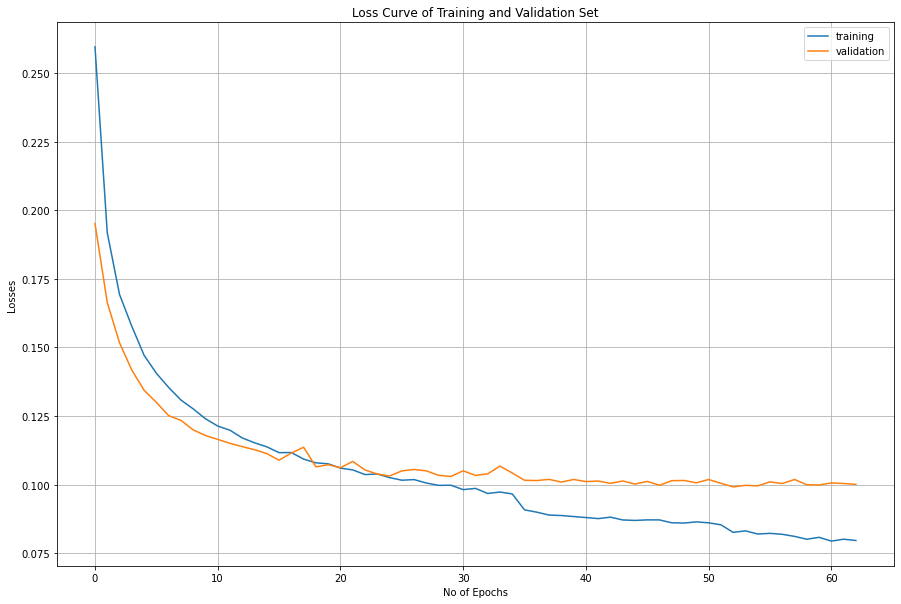

In [174]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Curve of Training and Validation Set')
plt.xlabel('No of Epochs')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)
plt.show()

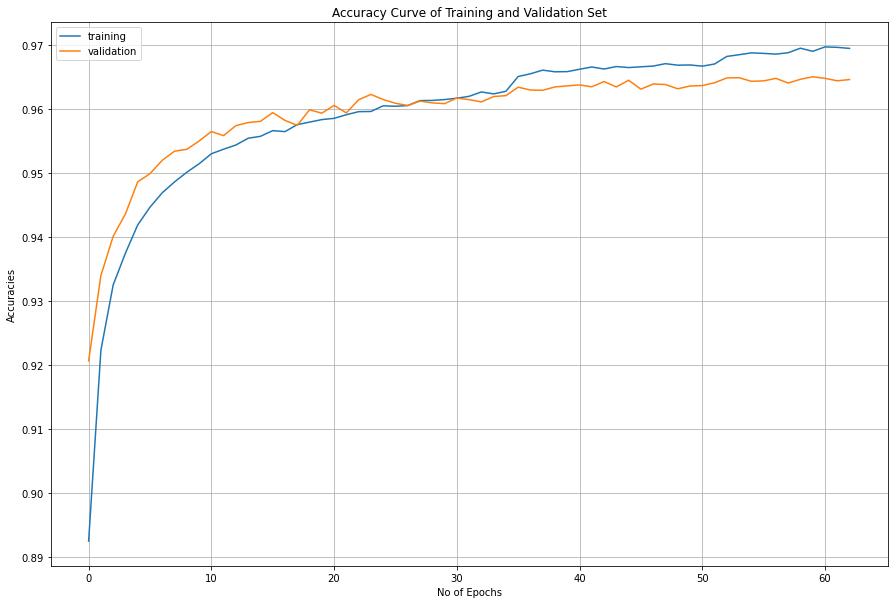

In [175]:
plt.figure(figsize=(15,10))
plt.plot(history.history['binary_accuracy'], label='training')
plt.plot(history.history['val_binary_accuracy'], label='validation')
plt.title('Accuracy Curve of Training and Validation Set')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracies')
plt.legend()
plt.grid(True)
plt.show()

In [176]:
model.evaluate(test_set, test_label)

623/623 [==============================] - 1s 1ms/step - loss: 0.0970 - binary_accuracy: 0.9649


[0.09701315313577652, 0.9649344086647034]

In [178]:
y_pred = model.predict(test_set)

In [179]:
y_pred = y_pred.round()

In [185]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [187]:
print('Accuracy:', accuracy_score(test_label, y_pred))
print('Recall score:', recall_score(test_label, y_pred, average='weighted'))
print('Precision score:', precision_score(test_label, y_pred, average='weighted'))
print('F1 score:', f1_score(test_label, y_pred, average='weighted'))

Accuracy: 0.8488512089896659
Recall score: 0.9736586167691739
Precision score: 0.969149729867405
F1 score: 0.971380088890113
